In [9]:
# Exploration of terrain generation from a voronoi diagram

In [1]:
from shapely import Point, MultiPoint, Polygon, LineString, GeometryCollection, box, affinity, ops

In [2]:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import progressbar
import colorsys
import json
import csv

In [3]:
from shapely import voronoi_polygons
from shapely.ops import voronoi_diagram
import shapely.geometry as geom

In [4]:
from dimensionality_reduction import reduce_dimensions
from tree import build_tree

In [5]:
EMBEDDINGS_FILE = 'embeddings.json'
REDUCED_FILE = 'reduced_embeddings_2d.csv'

In [6]:
with open(EMBEDDINGS_FILE,'r') as infile:
    data = json.load(infile)

In [7]:
embedding_labels = list(data.keys())
labels = [l[:-3] for l in embedding_labels] # get rid of '.md' file extension

In [8]:
embeddings = np.array([data[label] for label in embedding_labels])
latent_space = reduce_dimensions(embeddings,4)

In [9]:
latent_space, color_space = latent_space[:,0:2], latent_space[:,2:4]

In [10]:
# color_space = (color_space-np.min(color_space))/(np.max(color_space)-np.min(color_space))
# color_space = [colorsys.hsv_to_rgb(vals[0], vals[1]/2, 0.85) for vals in color_space]

In [10]:
with open(REDUCED_FILE, 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['x', 'y', 'filename'])
    for label, coords in zip(labels, latent_space):
        writer.writerow([coords[0], coords[1], label])

In [11]:
tree = build_tree(EMBEDDINGS_FILE)

In [12]:
total_nodes = tree.get_children()

In [13]:
points = MultiPoint(latent_space)

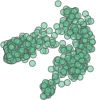

In [14]:
points

In [15]:
bounding_box = box(*points.bounds)
bounding_box = affinity.scale(bounding_box, xfact=1.2, yfact=1.2)

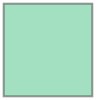

In [16]:
bounding_box

In [17]:
bx, by = bounding_box.exterior.coords.xy
max_dist = np.ceil(np.sqrt((max(bx)-min(bx))**2 + (max(by)-min(by))**2))

In [18]:
polygons = voronoi_polygons(points)

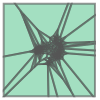

In [19]:
polygons

In [20]:

print(type(polygons))

<class 'shapely.geometry.collection.GeometryCollection'>


In [21]:
def render_scatter():
    for point in latent_space:
        plt.plot(*point, marker="o", markersize=0.3, markeredgecolor='black', markerfacecolor='black')

In [22]:
def render_labels(fontsize=1):
    fig = plt.gcf()
    ax = plt.gca()
    x = latent_space[:,0]
    y = latent_space[:,1]
    for i, label in enumerate(labels):
        txt = ax.text(x[i], y[i], ' '+label, size=fontsize, color='black', path_effects=[pe.withStroke(linewidth=fontsize/3, foreground='white')])

In [23]:
def render_voronoi(polygons, latent_space, colors, fontsize=1):
    # for i in (latent_space):
    #     plt.plot(*i, marker="o", markersize=0.3, markeredgecolor='black', markerfacecolor='black')

    for i, polygon in enumerate(polygons.geoms):
        clipped_polygon = polygon.intersection(bounding_box)
        point = latent_space[i]
        plt.plot(*point, marker="o", markersize=0.3, markeredgecolor='black', markerfacecolor='black')
        plt.plot(*clipped_polygon.exterior.xy, c='black', linewidth=0.2)
        plt.fill(*clipped_polygon.exterior.xy, c=colors[i])

In [24]:
def voronoi_split(polygons, latent_space, colors, fontsize=1):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Helper function to render polygons
    def render_on_axis(ax, polygons, points, colors):
        for i, polygon in enumerate(polygons):
            clipped_polygon = polygon.intersection(bounding_box)
            ax.plot(*clipped_polygon.exterior.xy, c='black', linewidth=0.2)
            ax.fill(*clipped_polygon.exterior.xy, c=colors[i])

    # Calculate the split index for the latent_space and colors lists
    n = len(polygons.geoms)
    split_index_1 = n // 3
    split_index_2 = 2 * split_index_1

    # Convert the GeometryCollection to a list and split it
    polygons_list = list(polygons.geoms)

    # Render the three parts on separate subplots
    render_on_axis(ax1, polygons_list[:split_index_1], latent_space[:split_index_1], colors[:split_index_1])
    render_on_axis(ax2, polygons_list[split_index_1:split_index_2], latent_space[split_index_1:split_index_2], colors[split_index_1:split_index_2])
    render_on_axis(ax3, polygons_list[split_index_2:], latent_space[split_index_2:], colors[split_index_2:])

    plt.show()



In [25]:
def render_voronoi_2(polygons, cluster_list, colors, bounding_box, fontsize=1):

    for i, polygon in enumerate(polygons.geoms):
        clipped_polygon = polygon.intersection(bounding_box)
        plt.plot(*clipped_polygon.exterior.xy, c='black', linewidth=0.2)
        plt.fill(*clipped_polygon.exterior.xy, c=colors[i])
    
    points = cluster_list
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    plt.scatter(x, y, color='Black')
    plt.show()
    #plt.plot(*point, marker="o", markersize=0.3, markeredgecolor='black', markerfacecolor='black')

    

In [26]:
from shapely.geometry import Point

def render_voronoi_cluster(polygons, cluster_list, colors, fontsize=1):
    for i, polygon in enumerate(polygons.geoms):
        clipped_polygon = polygon.intersection(bounding_box)
        plt.plot(*clipped_polygon.exterior.xy, c='black', linewidth=0.2)
        
        is_point_on_polygon = False
        for point in cluster_list:
            if polygon.contains(Point(point)):
                is_point_on_polygon = True
                break

        if is_point_on_polygon:
            polygon_color = 'black'
        else:
            polygon_color = colors[i]

        plt.fill(*clipped_polygon.exterior.xy, c=polygon_color)


In [27]:
color_space = reduce_dimensions(embeddings,3)
color_space = (color_space-np.min(color_space))/(np.max(color_space)-np.min(color_space))

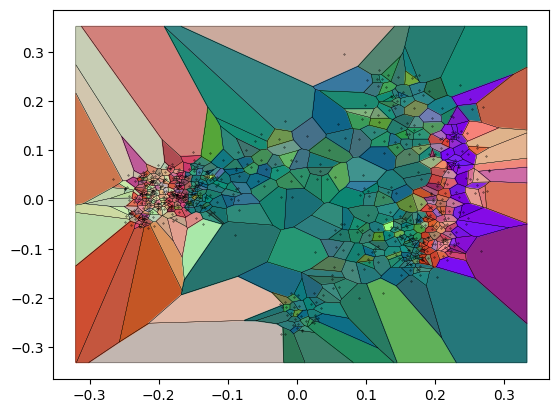

In [28]:
render_voronoi(polygons, latent_space, color_space)

In [36]:
file_path = r'C:\Users\ybinb\VS\lociLab\GraphGurusVault\src\clusters.npy'
clusters_centroids = np.load(file_path, allow_pickle=True)
print(clusters_centroids[0])

[(-5.980999459260102e-18, -2.990499729630051e-18)]


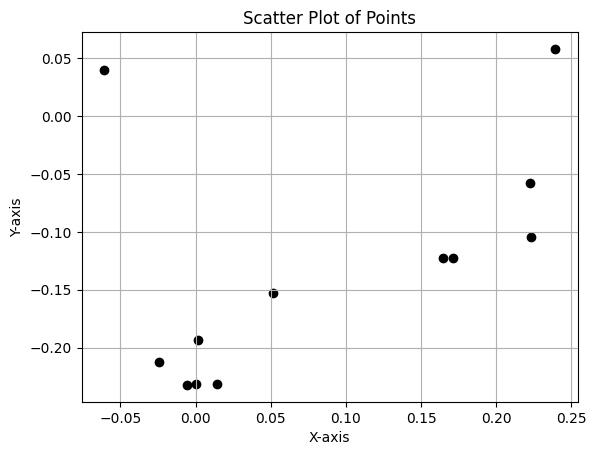

In [30]:
points = clusters_centroids[65]

# for point in points:
#     plt.scatter(*point)
#     plt.show()

x = [point[0] for point in points]
y = [point[1] for point in points]

plt.scatter(x, y, color='Black')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')
plt.grid(True)
plt.show()

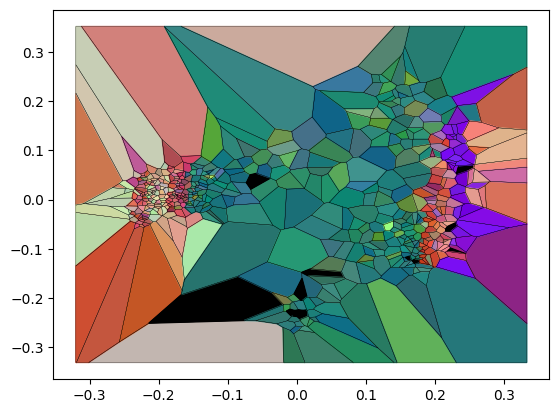

In [31]:
render_voronoi_cluster(polygons, points, color_space)

In [32]:
import geopandas as gpd
# add bbox as parameter.
def voronoi_split_3(polygons, latent_space, colors, fontsize=1):
    
    # Helper function to save polygons to a GeoDataFrame.
    def render_on_axis(polygons, points, colors):
        voronoi_polygons = []
        for i, polygon in enumerate(polygons):
            clipped_polygon = polygon.intersection(bounding_box)
            point = latent_space[i]
            voronoi_polygons.append(clipped_polygon)
        gdf = gpd.GeoDataFrame(geometry=voronoi_polygons)
        return gdf

    # Calculate the split index for the latent_space and colors lists
    n = len(polygons.geoms)
    split_index_1 = n // 3
    split_index_2 = 2 * split_index_1

    polygons_list = list(polygons.geoms)

    voronoi_1 = render_on_axis(polygons_list[:split_index_1], latent_space[:split_index_1], colors[:split_index_1])
    voronoi_2 = render_on_axis(polygons_list[split_index_1:split_index_2], latent_space[split_index_1:split_index_2], colors[split_index_1:split_index_2])
    voronoi_3 = render_on_axis(polygons_list[split_index_2:], latent_space[split_index_2:], colors[split_index_2:])

    return voronoi_1, voronoi_2, voronoi_3


In [33]:
import geopandas as gpd

def create_voronoi_gdf(polygons, latent_space):
    voronoi_polygons = []

    for i, polygon in enumerate(polygons.geoms):
        clipped_polygon = polygon.intersection(bounding_box)
        point = latent_space[i]
        voronoi_polygons.append(clipped_polygon)

    gdf = gpd.GeoDataFrame(geometry=voronoi_polygons)
    return gdf


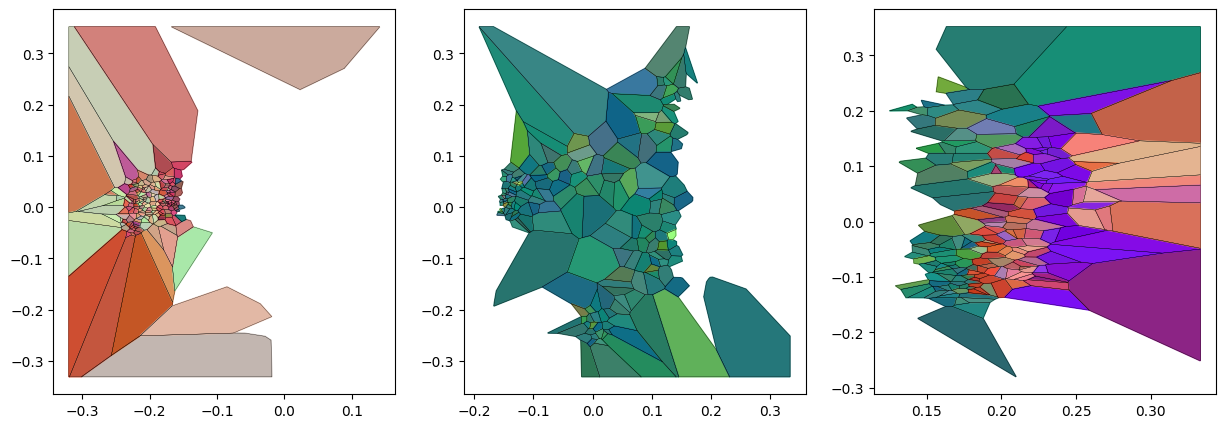

In [34]:
voronoi_split(polygons, latent_space, color_space)

In [35]:
v1, v2, v3 = voronoi_split_3(polygons, latent_space, color_space)

In [162]:
v1.to_file("voronoi_split_1.geojson", driver="GeoJSON")
v2.to_file("voronoi_split_2.geojson", driver="GeoJSON")
v3.to_file("voronoi_split_3.geojson", driver="GeoJSON")

In [109]:
#voronoi_triangles_2.to_file("voronoi_triangles_2.geojson", driver="GeoJSON")

In [147]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

# Create Voronoi diagram
vor = Voronoi(np.array(latent_space))

# fig, ax = plt.subplots()
# voronoi_plot_2d(vor, ax=ax)

# Extract Voronoi polygons
voronoi_polygons = [Polygon(vor.vertices[region]) for region in vor.regions if -1 not in region and len(region) > 0]
multipolygon = GeometryCollection(voronoi_polygons)

# Sort the polygons by area, from smallest to largest
sorted_polygons = sorted(voronoi_polygons, key=lambda p: p.area)
sorted_multipolygon = GeometryCollection(sorted_polygons)


#print(sorted_multipolygon)


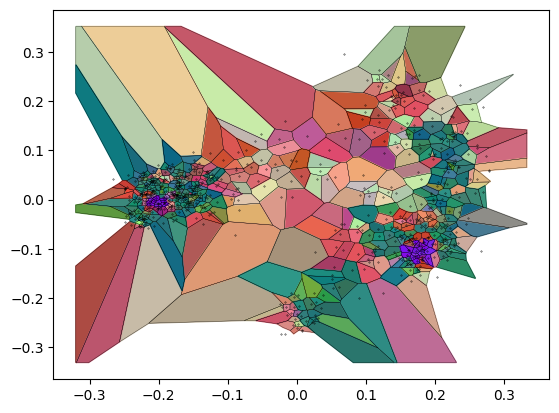

In [148]:
render_voronoi(multipolygon, latent_space, color_space)

In [131]:
voronoi_triangles_2 = create_voronoi_gdf(sorted_multipolygon, latent_space)

voronoi_triangles_2

,geometry
0,"POLYGON ((-0.17547 0.01103, -0.17418 0.01047, ..."
1,"POLYGON ((-0.17202 0.01091, -0.17215 0.00724, ..."
2,"POLYGON ((-0.21020 0.03914, -0.20576 0.03824, ..."
3,"POLYGON ((-0.17569 0.01062, -0.17432 0.00745, ..."
4,"POLYGON ((-0.21112 0.03586, -0.21000 0.03846, ..."
...,...
577,"POLYGON ((0.25727 0.07084, 0.25799 0.07155, 0...."
578,"POLYGON ((0.20991 -0.28028, 0.23125 -0.33076, ..."
579,"POLYGON ((-0.19120 0.35085, -0.12857 0.18799, ..."
580,"POLYGON ((0.20847 0.24813, 0.18855 0.23870, 0...."
